In [1]:
# !wget https://bit.ly/fruits_300_data -0 fruits_300.npy
# https://www.kaggle.com/datasets/moltean/fruits?resource=download

- 비지도 학습
    - 정답이 없는 데이터에서 패턴을 발견
    - 데이터에 대한 사전지식이 부족할때 유용
    - 대표적인 알고리즘
        - 군집(클러스터링)
            - 고객을 세분화
            - 문서 분류
            - 이미지 분류

데이터 가져오기

In [2]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fr = np.load('fruits_300.npy')
fr.shape
# 100 * 100 이미지 300개(batch수 300)

(300, 100, 100)

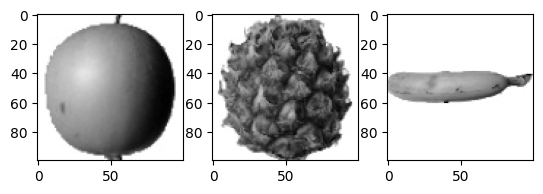

In [4]:
fr[0].shape # 첫번째 이미지
plt.subplot(1,3,1)
plt.imshow(fr[0],cmap='gray_r')
plt.subplot(1,3,2)
plt.imshow(fr[100],cmap='gray_r')
plt.subplot(1,3,3)
plt.imshow(fr[200],cmap='gray_r')
plt.show()

In [5]:
# 차원 변경하기
type(fr[0]) # numpy.ndarray
test = np.array([
    [
        [1,2],
        [3,4]
    ],
    [
        [10,20],
        [30,40]
    ],
    [
        [100,200],
        [300,400]
    ]
])
test.shape # (2, 2) 2차원 데이터
test.reshape(3,2*2)

array([[  1,   2,   3,   4],
       [ 10,  20,  30,  40],
       [100, 200, 300, 400]])

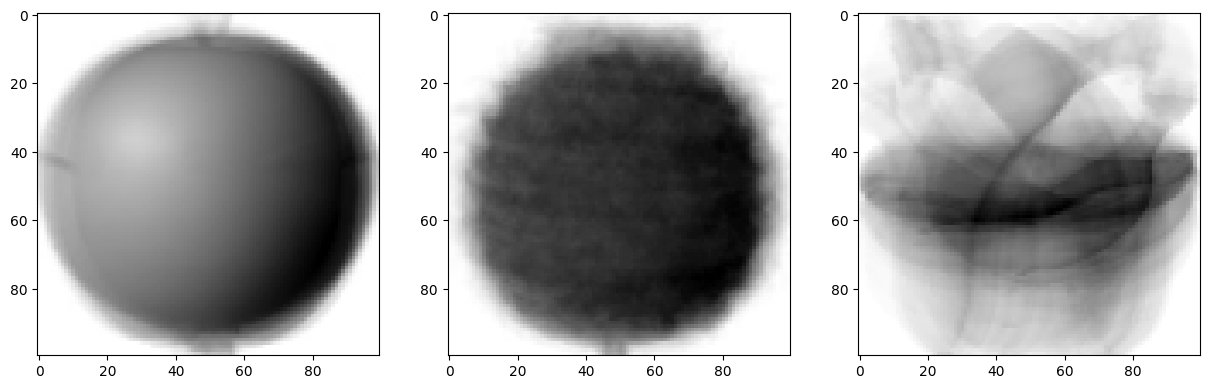

In [6]:
# fr.reshape(300,100*100) # 각 픽셀을 1차원 데이터로
fr2 = fr.reshape(300,-1) # 하나가 정해지면 나머지는 자동으로 결정되므로
apple = fr2[:100] # 100
pineApple = fr2[100:200] # 100
banana = fr2[200:] # 100
apple.shape
# 각 픽셀의 평균 값 즉 평균 이미지
apple_mean = apple.mean(axis=0)
pineApple_mean = pineApple.mean(axis=0)
banana_mean = banana.mean(axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(apple_mean.reshape(100,100),cmap='gray_r')

plt.subplot(1,3,2)
plt.imshow(pineApple_mean.reshape(100,100), cmap='gray_r')

plt.subplot(1,3,3)
plt.imshow(banana_mean.reshape(100,100), cmap='gray_r')

In [31]:
# 각 이미지의 평균값
a_m,p_m,b_m = apple.mean(), pineApple.mean(), banana.mean()
print(a_m, p_m, b_m)
# 전체 데이터의 이미지별로 평균을 구하고
# 해당 데이터집합에서 apple 평균의 차
# 해당 데이터집합에서 pineApple 평균의 차
# 해당 데이터집합에서 banana 평균의 차
fr_per_mean = fr.mean(axis=(1,2)) # (300,100,100)에서 axis (0,1,2)
# 각 그룹에 대한 오차를 계산
diff_apple = np.abs(fr_per_mean - a_m)
diff_pineApple = np.abs(fr_per_mean - p_m)
diff_banana = np.abs(fr_per_mean - b_m)

92.987736 96.260623 34.597277


(82, 100, 100)

In [37]:
a = np.array([1,20,3])
b = np.array([0,2,30])
print(a,b)
np.min([a,b],axis=0), np.argmin([a,b],axis=0) # 인덱스

[ 1 20  3] [ 0  2 30]


(array([0, 2, 3]), array([1, 1, 0], dtype=int64))

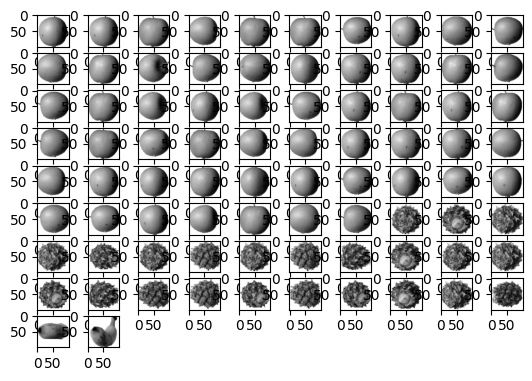

In [39]:
# 오차가 작은값을 가지는 그룹
classid = np.argmin([diff_apple, diff_pineApple, diff_banana],axis=0)
apple_image = fr[classid == 0] # apple
# apple_image.shape
for i in range(len(apple_image)):
    plt.subplot(10,10,i+1)
    plt.imshow(apple_image[i], cmap='binary')

In [61]:
ap = fr[:100]
pa = fr[100:200]
ba = fr[200:]
apm = np.mean(ap,axis=0)
pam = np.mean(pa,axis=0)
bam = np.mean(ba,axis=0)

In [62]:
ap_diff = np.abs(fr - apm)
ap_mean = np.mean(ap_diff,axis=(1,2))

pa_diff = np.abs(fr - pam)
pa_mean = np.mean(pa_diff,axis=(1,2))

ba_diff = np.abs(fr - bam)
ba_mean = np.mean(ba_diff,axis=(1,2))

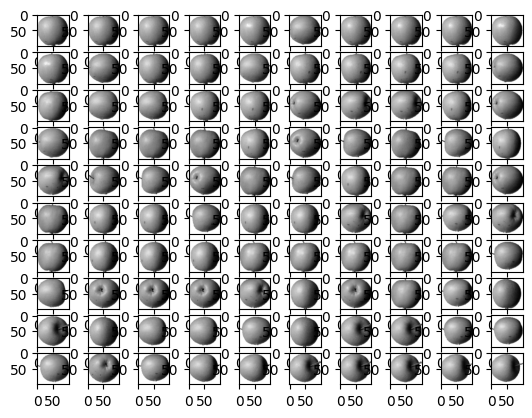

In [66]:
ap_idx = np.argsort(ap_mean)[:100]
for idx, img_index in enumerate(ap_idx):
    plt.subplot(10,10,idx+1)
    plt.imshow(fr[img_index], cmap='binary')

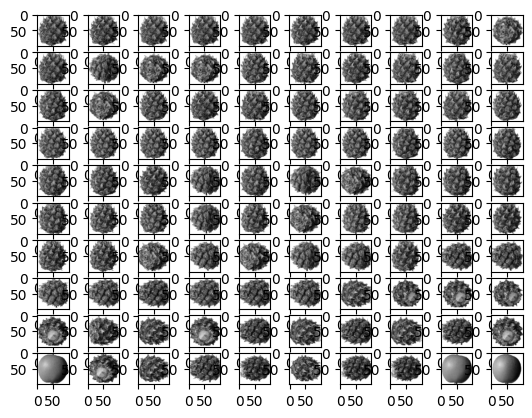

In [67]:
pa_idx = np.argsort(pa_mean)[:100]
for idx, img_index in enumerate(pa_idx):
    plt.subplot(10,10,idx+1)
    plt.imshow(fr[img_index], cmap='binary')

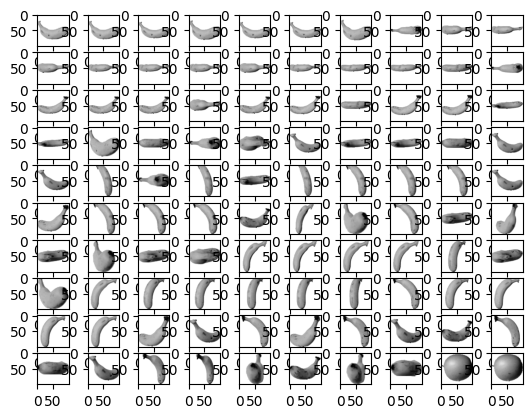

In [68]:
ba_idx = np.argsort(ba_mean)[:100]
for idx, img_index in enumerate(ba_idx):
    plt.subplot(10,10,idx+1)
    plt.imshow(fr[img_index], cmap='binary')

In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
fr_ss = ss.fit_transform(fr2)
fr_ss

array([[-0.13993733, -0.13453456, -0.14727007, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13993733, -0.13453456, -0.14727007, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13993733, -0.13453456, -0.14727007, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13993733, -0.13453456, -0.14727007, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13993733, -0.13453456, -0.14727007, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13993733, -0.13453456, -0.14727007, ...,  0.        ,
         0.        ,  0.        ]])

- k 평균
    - 군집의 수 k를 설정
    - 랜덤하게 k개의 중심을 선택
    - k개에서 가장 가까운 데이터(이미지)들의 평균을 구해서 새로운 중심점으로 이동
    - 이 과정을 거치면 k의 포인터 주변에(이웃) 동일한 또는 비슷한 속성을 가지는 군집의 중심점으로 이동 완료

In [91]:
# 사이킷런은 2차원 데이터를 요구
# 원본데이터는 300,100,100 --> 300,10000
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) # random_state = 32일 때 분류
km.fit(fr2)

KMeans(n_clusters=3, random_state=42)

In [92]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2]), array([112,  98,  90], dtype=int64))

In [95]:
lable_0 = np.where(km.labels_== 0)[0]
lable_1 = np.where(km.labels_== 1)[0]
lable_2 = np.where(km.labels_== 2)[0]

In [96]:
len(lable_0)

112

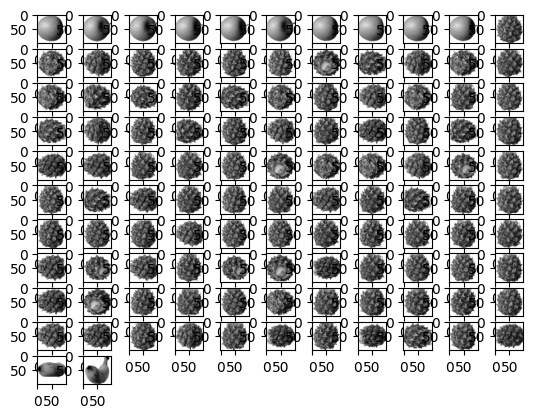

In [99]:
for i, idx in enumerate(lable_0):
    plt.subplot(11,11,i+1)
    plt.imshow(fr[idx],cmap='gray_r')

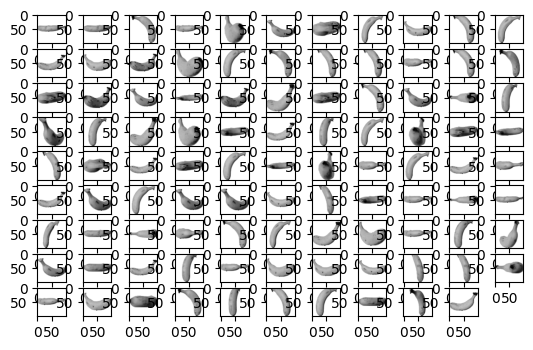

In [100]:
for i, idx in enumerate(lable_1):
    plt.subplot(11,11,i+1)
    plt.imshow(fr[idx],cmap='gray_r')

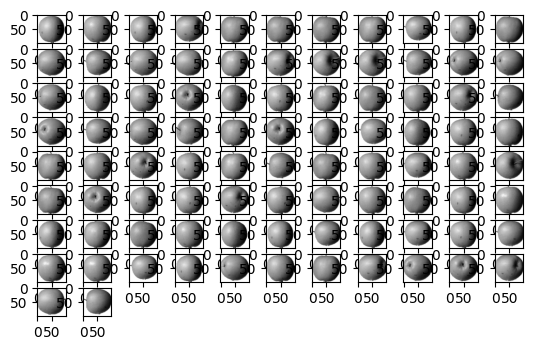

In [101]:
for i, idx in enumerate(lable_2):
    plt.subplot(11,11,i+1)
    plt.imshow(fr[idx],cmap='gray_r')

In [102]:
(km.cluster_centers_)

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]])

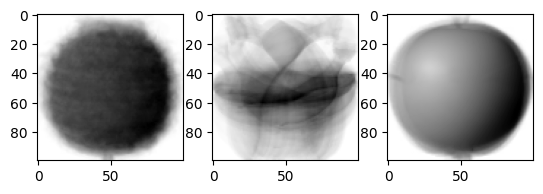

In [130]:
# 이미지에 대한 클러스터 군집의 평균, 즉 각 픽셀의 평균.. 그래서 평균 이미지 모양을 하고 있음
km.cluster_centers_[0].reshape(-1,100,100).shape
for i,img in enumerate(km.cluster_centers_):
    plt.subplot(1,3,i+1)
    plt.imshow(img.reshape(100,100),cmap='gray_r' )

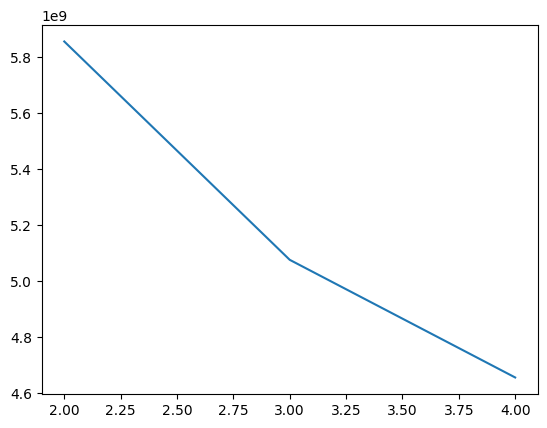

In [131]:
# 최적의 k 개수 - 엘보우 기법
# 군집의 수에 따른 inertia, SSE 값을 계산해서 급격한 변화가 일어나는 지점이 최적
# SSE 각 샘플하고 군집간의 거리의 제곱의 랍, inertia 군집의 집도... 둘다 비슷한 개념
result = []
for k in range(2,5):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fr2)
    result.append(km.inertia_)

plt.plot(range(2,5), result)

In [110]:
fr2.shape

(300, 10000)

In [119]:
# PCA로 2차원으로 축소해서 군집별로 시각화
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
fr_pca = pca.fit_transform(fr2)
fr_pca.shape

(300, 2)

<Axes: xlabel='0', ylabel='1'>

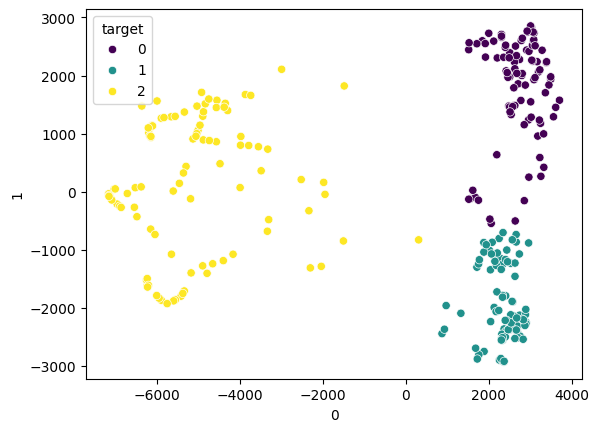

In [129]:
import seaborn as sns
df = pd.DataFrame(fr_pca)
df['target'] = [0]*100+[1]*100+[2]*100
sns.scatterplot(data=df,x=0,y=1,hue='target',palette='viridis') 

- 핸즈온 p.300
    - 군집
    - 이상치 탐지
    - 밀도 추정

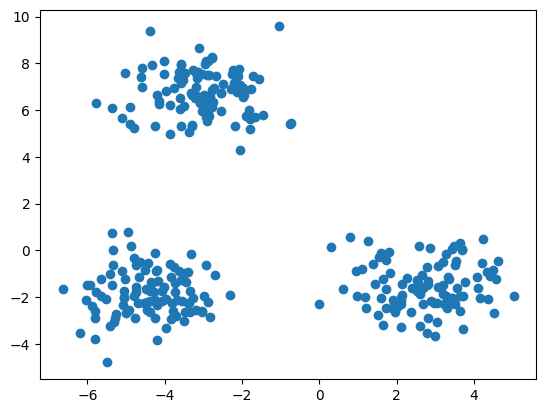

In [165]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300, centers=3, n_features=2) # 300샘플, 군집은 3개, 차수는 2
plt.scatter(X[:,0],X[:,1])

In [166]:
# 미니배치 kmeans
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=3,random_state=42)
mbk.fit(fr2)
mbk.labels_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

비지도

In [167]:
# https://archive.ics.uci.edu/dataset/292/wholesale+customers
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

In [168]:
X.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [171]:
y.head()
y.value_counts()

Region
3         316
1          77
2          47
Name: count, dtype: int64

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [176]:
x = X.iloc[:,:5]

In [177]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=3,random_state=42)
mbk.fit(x)
mbk.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y,mbk.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.15      0.08      0.10        77
           2       0.14      0.15      0.15        47
           3       0.00      0.00      0.00       316

    accuracy                           0.03       440
   macro avg       0.07      0.06      0.06       440
weighted avg       0.04      0.03      0.03       440



c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\AppData\Local\anaconda3\envs\pypandas\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [179]:
X.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [182]:
x = X.iloc[:,:5]
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)
from sklearn.cluster import KMeans

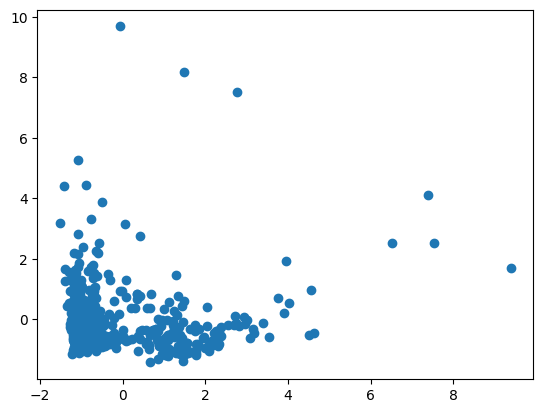

In [188]:
# 시각화를 통해 군집 모양이 나오는지 확인
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2) # 2차원으로 변환
x_scaled_pca = pca.fit_transform(x_scaled)
plt.scatter(x_scaled_pca[:,0], x_scaled_pca[:,1])

In [190]:
# 클러스터의 개수는 5개로 시작 (기본 n_clusters=8개)
# help(KMeans)
km = KMeans(n_clusters=5)
km.fit(x_scaled)
# 예측
print(km.labels_)
X['Cluster'] = km.labels_
X.head()

[3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 0 3 0 3 0 3 0 4 2 3 3 0 0 3 4 0 0 0 4 0 3 4
 3 3 4 4 0 3 3 3 3 3 2 3 2 0 0 4 3 4 0 2 3 0 0 3 2 3 3 0 2 0 3 0 0 4 4 0 3
 3 4 0 3 0 0 0 3 3 4 3 2 2 4 0 4 0 0 2 1 3 0 3 0 0 0 3 3 3 1 0 0 3 3 3 3 0
 3 4 0 0 0 0 0 4 0 0 0 0 3 4 1 4 3 0 4 0 0 0 0 0 0 0 0 0 0 0 4 4 0 0 3 0 0
 0 4 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 3 3 0 0 0 3 3 0 3 0 3 4 0 0 0 0 1 0 1 0
 0 0 0 3 3 4 0 0 3 0 4 4 3 0 0 3 3 4 0 0 3 0 3 0 3 0 2 0 0 3 0 2 0 3 0 0 0
 0 3 0 0 3 0 0 0 3 0 4 0 0 0 0 4 0 4 4 4 0 0 0 3 0 0 0 0 0 2 0 4 0 4 0 0 4
 4 0 0 4 0 3 0 3 4 3 0 0 0 0 4 0 0 4 4 0 3 0 3 4 4 4 4 0 4 0 4 0 0 0 3 0 3
 0 3 3 0 3 3 3 3 3 3 3 0 0 3 0 4 3 0 0 3 0 0 0 3 0 0 0 0 4 1 0 0 4 0 0 3 4
 2 4 3 0 0 0 0 3 3 0 3 0 0 3 3 0 3 0 3 0 3 0 0 4 3 0 0 0 0 0 0 0 3 0 0 4 0
 4 4 0 3 0 0 3 4 0 3 4 4 4 0 3 0 0 0 0 0 0 0 0 4 0 0 3 0 0 0 0 4 4 4 4 0 4
 3 3 0 0 0 0 4 0 3 3 0 3 0 0 3 4 3 3 4 0 4 0 0 0 4 0 0 0 4 4 3 0 0]


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,12669,9656,7561,214,2674,1338,3
1,2,7057,9810,9568,1762,3293,1776,3
2,2,6353,8808,7684,2405,3516,7844,3
3,1,13265,1196,4221,6404,507,1788,0
4,2,22615,5410,7198,3915,1777,5185,3


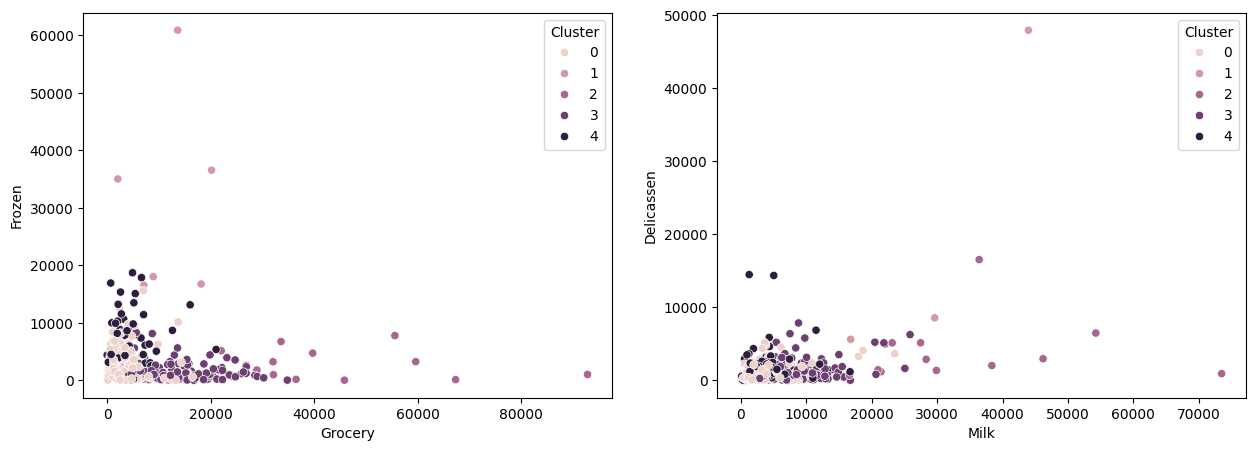

In [199]:
# 시각화
# Grocery Frozen Cluster별로 구분
# Milk Delicassen
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=X, x=X['Grocery'], y=X['Frozen'], hue = 'Cluster')
# X.plot(kind='scatter',x='Grocery', y ='Frozen', c='Cluster', cmap='Set1', colorbar=True)
plt.subplot(1,2,2)
sns.scatterplot(data=X, x='Milk',y='Delicassen',hue='Cluster')
# X.plot(kind='scatter',x='Milk', y ='Frozen', c='Cluster', cmap='Set1', colorbar=True)
plt.show()

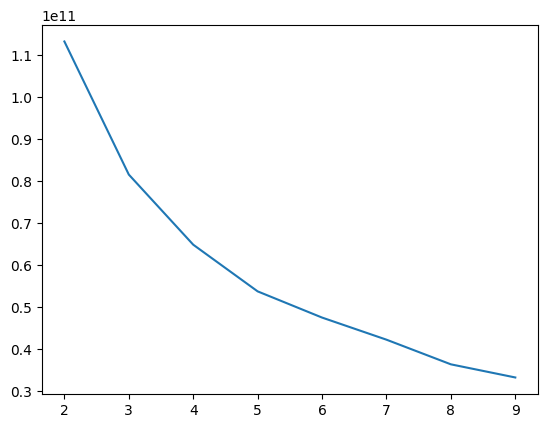

In [200]:
# # 클러스터를 임의로 구성해서 동떨어져 있는 클러스터를 제외하고 다시 시각화
# mask = ((X['Cluster'] == 0) | (X['Cluster'] == 4))
# mdf= X[mask]
result = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    result.append(km.inertia_)
plt.plot(range(2,10), result)

- DBSCAN
    - 데이터의 분포의 형태에 관계없이 밀도 기반으로 군집을 찾는다
    - KMean처럼 미리 클러스터의 수를 정하지 않는다
    - esp : 포인트 사이의 거리의 임계값 두 포인트가 같은 군집이 되려면 얼마나 가까운지
    - 랜덤한 포인트에서 시작 그 주변(R == esp)에 있는 포인트를 찾는다
    - min_samples : 군집의 중심이 되기 위한 최소한의 이웃수
    - 해당 포인트가 핵심 포인트(이웃의 수가 min_samples 이상)
    - 반복하면서 클러스터를 찾는다

In [262]:
from sklearn.cluster import DBSCAN
# help(DBSCAN)
x_scaled = StandardScaler().fit_transform(X.iloc[:,:-1])
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_y = dbscan.fit_predict(x_scaled)
print(np.unique(dbscan_y))
dbscan_y


[-1  0  1]


array([ 0,  0, -1,  1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
       -1,  0,  1,  0,  1, -1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  0,  1,  0,  0, -1, -1,  1,  0,  0,  0, -1,  0, -1,  0, -1,  1,
        1, -1,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1, -1,  0,
        0, -1,  1,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0, -1,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0, -1, -1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0, -1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1

cluster
 1    253
 0    102
-1     85
Name: count, dtype: int64


(0.0, 20000.0)

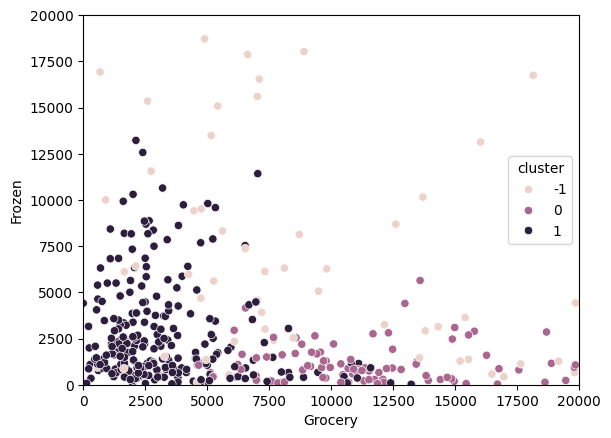

In [263]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

wholesale_customers = fetch_ucirepo(id=292)   
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 모델 생성 및 적합
dbscan = DBSCAN(eps=0.8, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# 클러스터 결과 확인
X['cluster'] = y_dbscan
print(X['cluster'].value_counts())  # 각 군집의 포인트 수 확인

# 클러스터링 결과 시각화 (2개의 주요 특성으로 시각화)
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, cmap='plasma', edgecolor='k')
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("DBSCAN Clustering of Wholesale Customers")
# plt.show()

sns.scatterplot(data=X, x='Grocery', y='Frozen',hue='cluster')
plt.xlim(0,20000)
plt.ylim(0,20000)

In [264]:
# DBASCAN
# 코어 포인트, 경계 포안트 속하지 않는 곳

- 실루엣
    - 실루엣 점수 : 군집화이 성능을 평가하는 지표, 각 데이터가 얼마나 잘 군집에서 속하는지 측정
    - 각 포인트의  군집내 응집도와 군집간 분리도를 비교해서 계산
    - -1 ~ 1
        - 해당 포인트가 1에 가까울수록 군집에 잘 속해 있음
        - 0에 가까울수록 경계
        - -1에 가까울수록 잘못된 군집에
    - 실루엣 계수
        - s(i) = ( b(i) - a(i))/max(a(i),b(i))
        - a(i) : 포인트 i가 속한 군집의 다른 데이터의 포인트들과의 평균거리 응집도
        - b(i) : 포인트 i하고 가장 가까운 다른 군집의 평균 거리
        -실루엣 계수들의 평균
            - 0.5 이상이면 잘 분리되었다
            - 0 에 가까우면 서로 겹쳐있을 확률이 높다

In [265]:
from sklearn.metrics import silhouette_score

In [266]:
# 실루엣 계산은 노이즈 데이터는 제외 여기서 노이즈 DBSCAN을 했을 때 라벨이 -1인 데이터는 제외
mask = y_dbscan !=-1
x_filtered = X_scaled[mask]
y_filtered = y_dbscan[mask]
silhouette_score(x_filtered,y_filtered)

0.5473723750823967